## 학습목표
 1. numpy & pandas basic

* 연습문제 풀이)
 - tf-idf는 각 문서에 있는 단어별로 구해야 함
 - the의 경우, 모든 문서에 나오기 때문에, 각각 문서에서의 각기 다른 tf-idf를 갖게 됨
 
 - ip address 정규표현식

In [16]:
import os
from collections import defaultdict
from collections import OrderedDict

class TFIDFCaculator(object):
    def __init__(self, path):
        self.path = path
        self.tf_dict = {}
        self.df_dict = defaultdict(int)

    # 각 문서별 단어별 tf dictionary 생성
    def build_tf_dict(self):
        for root, dirs, files in os.walk(self.path): 
            for f in files: # 각 문서에 대해 순회
                self.tf_dict[f] = defaultdict(int) # 문서별로 이름을 key로 갖는 dict 생성
                with open(os.path.join(self.path, f), 'r') as fout:
                    data = fout.read() # 각 문서의 모든 내용을 읽어들임
                    # 각 내용을 공백으로 잘라서 소문자로 변경 후, 리스트로 만듦
                    words = [word.lower() for word in data.split()] 

                    for w in words:
                        # 앞서 만든 리스트를 순회하면서 각 단어가 출현할 때마 카운팅
                        # f는 문서이름, w는 각 단어를 의미
                        self.tf_dict[f][w] += 1
                        
                        
    # 문서에 존재하는 모든 단어들에 대해 document frequency 생성
    def build_df_dict(self):
        
        # 문서내에 존재하는 모든 단어 추출
        all_keys = list(set([key for doc in self.tf_dict for key in self.tf_dict[doc]]))
        
        for key in all_keys: # 해당 단어 리스트를 순회
            for root, dirs, files in os.walk(self.path):
                for f in files:
                    with open(os.path.join(self.path, f)) as fout:
                        data = fout.read() 
                        words = [word.lower() for word in data.split()]  
                        # 단어들이 전체 문서에서 몇번 출현했는지 빈도 확인
                        if key in words:
                            self.df_dict[key] += 1
         
    # tf, df를 이용하여 tf-idf 결과 생성
    def get_tf_idf_dict(self, reverse = True):
        tf_idf_dict = {}
        
        # doc은 각 문서의 명칭
        for doc in self.tf_dict:
            tf_idf_dict[doc] = {}
            # key는 단어, value는 해당 단어가 doc에서 나타난 빈도수를 의미
            for key, value in self.tf_dict[doc].items():
                # 그것을 df_dict에 저장되어있는 출현한 문서수인 self.df_dict[key]로 나눔
                tf_idf_dict[doc][key] = float(value) / self.df_dict[key]
        
        # 각 문서를 빈도수에 따라 정렬
        for doc in tf_idf_dict:
            tf_idf_dict_by_doc = tf_idf_dict[doc]
            tf_idf_dict_by_doc = OrderedDict(sorted(tf_idf_dict_by_doc.items(), key = lambda x : x[1], reverse = reverse))
            tf_idf_dict[doc] = tf_idf_dict_by_doc
        return tf_idf_dict
            
            
path = os.getcwd() + '/data_set'            
tf_idf = TFIDFCaculator(path)            

tf_idf.build_tf_dict()
tf_idf.build_df_dict()

for doc, tf_idf_dict in tf_idf.get_tf_idf_dict().items():
    print doc 
    print tf_idf_dict

tf_idf2.txt
OrderedDict([('weather', 5.0), ('forecast', 2.0), ('the', 1.3333333333333333), ('sometimes', 1.0), ('people', 1.0), ('is', 1.0), ('hard', 1.0), ('in', 1.0), ('incorrect', 1.0), ('their', 1.0), ('going', 1.0), ('super', 1.0), ('this', 1.0), ('computers', 1.0), ('days', 1.0), ('these', 1.0), ('friends.', 1.0), ('however,', 1.0), ('are', 0.6666666666666666), ('to', 0.6666666666666666), ('predict', 0.5), ('it', 0.5), ('out', 0.5), ('with', 0.5), ('today', 0.5), ('nice', 0.5), ('very', 0.5), ('many', 0.5), ('used', 0.3333333333333333)])
tf_idf1.txt
OrderedDict([('python', 6.0), ('tools', 3.0), ('language', 3.0), ('and', 2.0), ('for', 2.0), ('apis', 2.0), ('the', 1.6666666666666667), ('is', 1.3333333333333333), ('debugger', 1.0), ('concise', 1.0), ('reasons', 1.0), ('powerful', 1.0), ('implemented', 1.0), ('any', 1.0), ('web', 1.0), ('compared', 1.0), ('from', 1.0), ('built', 1.0), ('specification', 1.0), ('also', 1.0), ('other', 1.0), ('widely', 1.0), ('include', 1.0), ('mostly'

In [17]:
import re
m = re.search(r'^((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$', '255.9.1.0')
print m.group()

m = re.search(r'^((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$', '256.9.1.0')
print m

#p|i [pi]
print re.search(r'(pik)+', 'pikpikpippip').group()

255.9.1.0
None
pikpik


* numpy 
  - 기본 array 생성

In [2]:
import numpy as np
print np.__version__

1.12.0


* ndarray
 - numpy의 기본 타입
 - vector, matrix를 표현
 - numpy.array([])로 생성

In [3]:
arr1 = np.array([1, 3, 4, 6])
arr2 = np.array([[0, 1, 2], [2, 4, 6]])

print arr1, type(arr1)
print arr2, type(arr2)

[1 3 4 6] <type 'numpy.ndarray'>
[[0 1 2]
 [2 4 6]] <type 'numpy.ndarray'>


* arange 
 - range()와 동일한 기능을 수행함
 - ndarray 반환

In [4]:
arr3 = np.arange(1, 11)
print arr3, type(arr3)

[ 1  2  3  4  5  6  7  8  9 10] <type 'numpy.ndarray'>


* linspace()
 - start, end를 n개의 균일한 간격으로 분할

In [5]:
# 0 - 2의 범위를 5-1 등분 한다는 이야기
arr4 = np.linspace(0, 2, 3)
print arr4

[ 0.  1.  2.]


* zeros
 - 전달된 tuple 사이즈 행렬 반환
 - 0으로 채워짐

In [6]:
print np.zeros((2, 4))
print np.zeros(4)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[ 0.  0.  0.  0.]


* ones
 - 전달된 tuple 사이즈 행렬 반환
 - 1로 채워짐

In [8]:
print np.ones((3, 3, 2, 7, 8))
#print np.ones(3)

[[[[[ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    ..., 
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]]

   [[ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    ..., 
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]]]


  [[[ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    ..., 
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]]

   [[ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    ..., 
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]]]


  [[[ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
    [ 1.  1.  1. ...,  1.  1.  1.]
   

* random sub package
 - 무작위에 관한 모든 기능이 들어있음

In [9]:
print np.random.rand(3) # [0, 1) 사이 출력
print np.random.randn(3) # 정규분포

[ 0.97410827  0.42025532  0.62058426]
[-0.2953504  -0.58640909 -1.07161196]


In [ ]:
a = np.random.rand()

In [ ]:
print a

seed 함수 동작 알아볼 것

In [24]:
np.random.seed(0) # 랜덤한 값을 계속 유지하고 싶을 때 사용
print np.random.rand()

np.random.seed(2) # 랜덤한 값을 계속 유지하고 싶을 때 사용
print np.random.rand()

0.548813503927
0.435994902142


* slicing
 - 리스트, 문자열 slicing과 동일함

In [25]:
arr1 = np.array([1, 3, 4, 6])
arr2 = np.array([[0, 1, 3], [2, 4, 6]])

In [26]:
print arr1[0]
print arr1[1:-1]

1
[3 4]


In [27]:
arr2 = np.array([[0, 1, 3], [2, 4, 6]])

print arr2[0]
print arr2[0, 1]
print arr2[1:, :2]
print arr2[:, 2]
print arr2[:, 1:]


[0 1 3]
1
[[2 4]]
[3 6]
[[1 3]
 [4 6]]


* array masking
  - numpy의 원소를 선택하거나 제거하여 추출하는 방법

In [28]:
arr = np.random.randint(0, 35, 10)
print arr

[26 20  3  4 33  3  5 24  4  6]


In [29]:
even_mask = (arr % 2 == 0)
print arr[even_mask]

#np.array([True, False])


print arr[arr % 2 == 0]

[26 20  4 24  4  6]
[26 20  4 24  4  6]


* operations
  - 기본 연산은 벡터화되어 전체 원소에 적용된다.

In [30]:
#range(1, 7) * 5


#for i in range(1, 7):
#    i * 5

arr = np.arange(1, 7) * 5
print arr

[ 5 10 15 20 25 30]


In [31]:
arr2 = arr ** 4
print arr2
print arr2 ** 0.5

[   625  10000  50625 160000 390625 810000]
[  25.  100.  225.  400.  625.  900.]


In [35]:
arr1 = np.arange(0, 30, 3) + 3
arr2 = np.arange(1, 11)
print arr1, arr2

print arr1 - arr2
print arr1 * arr2
print arr1 * arr1
#print arr1 ^2 
print arr1 ** 2

[ 3  6  9 12 15 18 21 24 27 30] [ 1  2  3  4  5  6  7  8  9 10]
[ 2  4  6  8 10 12 14 16 18 20]
[  3  12  27  48  75 108 147 192 243 300]
[  9  36  81 144 225 324 441 576 729 900]
[  9  36  81 144 225 324 441 576 729 900]


In [83]:
arr1 = np.array([[1, 1], [1, 1]])
arr2 = np.array([[2, 2], [2, 2]])

print arr1 * arr2  # 원소끼리의 곱
print arr1.dot(arr2) # 행렬 곱

[[2 2]
 [2 2]]
[[4 4]
 [4 4]]


* logical operator 
  - all(), any()

In [36]:
arr = np.random.randint(1, 10, size = (4,4))
print arr

[[4 3 1 5]
 [3 5 2 8]
 [9 3 9 8]
 [2 7 9 6]]


In [37]:
print np.all(arr < 7)

False


In [38]:
print np.any(arr % 7 == 0)

True


* ravel
  - 다차원배열을 1차원으로 늘이기

In [39]:
arr = np.array([np.arange(1, 6), np.arange(10, 15)])
print arr
print arr.ravel()

[[ 1  2  3  4  5]
 [10 11 12 13 14]]
[ 1  2  3  4  5 10 11 12 13 14]


* reshaping
 - array의 shape을 재정렬

In [40]:
arr = np.arange(1, 16)
print arr
arr2 = arr.reshape(3, 5)
print arr2
print arr

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


* 자주 쓰는 numpy 함수

In [42]:
print arr
print np.min(arr)
print np.mean(arr)
print np.median(arr)
print np.max(arr)
print np.std(arr)
print np.argmin(arr)
print np.argmax(arr)
print np.sum(arr)
print np.sqrt(arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
1
8.0
8.0
15
4.32049379894
0
14
120
[ 1.          1.41421356  1.73205081  2.          2.23606798  2.44948974
  2.64575131  2.82842712  3.          3.16227766  3.31662479  3.46410162
  3.60555128  3.74165739  3.87298335]


In [83]:
#bit-wise XOR
a = 10
print 10 ^ 2
print 17 ^ 8

8
25


* 연습문제)
1. numpy를 이용하여 Math.pi 값을 다시 구해봅시다.
2. python 기본 리스트 객체로 만든 두 행렬을 곱하는 코드를 작성하시오.

In [84]:
a = np.random.rand(100, 2)
print a

[[ 0.74194424  0.55825631]
 [ 0.18994125  0.78384214]
 [ 0.76263619  0.64420529]
 [ 0.73211458  0.77076316]
 [ 0.14700126  0.88059889]
 [ 0.03956389  0.99518171]
 [ 0.32738795  0.74726435]
 [ 0.81867304  0.81076625]
 [ 0.32953839  0.3979079 ]
 [ 0.07032064  0.80936446]
 [ 0.68850454  0.48001862]
 [ 0.47837648  0.30403261]
 [ 0.88256343  0.05919321]
 [ 0.54359925  0.5392251 ]
 [ 0.41792605  0.24464111]
 [ 0.50077178  0.90789841]
 [ 0.54133637  0.16143614]
 [ 0.0402756   0.83938844]
 [ 0.49649462  0.21771705]
 [ 0.57654428  0.47361565]
 [ 0.56798692  0.00572218]
 [ 0.05711627  0.82189308]
 [ 0.05126117  0.47141562]
 [ 0.82399147  0.5727931 ]
 [ 0.64950413  0.9960596 ]
 [ 0.78612537  0.67003927]
 [ 0.47437738  0.56428483]
 [ 0.94159002  0.8861331 ]
 [ 0.04100681  0.80051937]
 [ 0.07281738  0.09036695]
 [ 0.77311075  0.26572623]
 [ 0.56913808  0.70256569]
 [ 0.80697546  0.56747204]
 [ 0.31662221  0.73170283]
 [ 0.2471385   0.6074777 ]
 [ 0.25375347  0.71373537]
 [ 0.64794893  0.42725271]
 

In [82]:
print np.sum(a)

107.790443869


In [80]:
print np.sum(a, axis=0)

[ 53.63023422  54.16020965]


In [81]:
print np.sum(a, axis=1)

[ 0.7977368   1.30034321  0.69695946  1.77238152  0.35382177  0.92375354
  1.53649751  0.962432    0.7767875   1.16135604  1.39164442  1.51223666
  0.89526578  1.7959317   0.50129861  1.38494868  1.65248127  0.99926708
  0.53731909  1.25381768  1.00538101  0.89769296  1.58346087  0.9198245
  1.33298428  1.5877017   0.55381224  0.25284233  1.11568993  1.18842294
  0.95663941  0.58957972  1.34904545  1.40723672  1.48724695  1.0999769
  1.02706667  0.94619708  1.40060758  0.37026877  1.2407811   1.00102885
  0.95967078  0.98091632  1.32886018  0.35456979  1.29823338  1.11369328
  0.62958232  1.14879785  1.01013459  0.87219468  1.03579842  1.0910364
  1.12169459  1.21533605  1.41186278  1.01348974  1.08275281  1.57232415
  0.95349614  1.24424036  0.95305108  1.00708393  0.96147829  1.11219978
  0.79699624  0.8133463   1.3674962   1.08348584  0.66983618  1.37508284
  1.6724902   0.23958081  1.21795112  0.69773255  1.23740203  1.67142129
  0.71290727  1.60703183  1.89942951  1.26392476  0.95

In [86]:
# numpy only
count = 100000
points = np.random.rand(count, 2)
points_sum = np.sum(points ** 2, axis = 1)
print points_sum <= 1.0
p =  np.sum(points_sum <= 1.0) / float(count)
print p * 4

[ True  True  True ..., False  True False]
3.14028


In [42]:
# numpy & pure python
total = 100000
count = 0 
for i in xrange(total):
    point = np.random.rand(2)
    
    distance = np.sqrt(np.sum(point ** 2))
    if distance <= 1:
        count += 1
        
print count / float(total) * 4



3.1458


In [43]:
def matrix_mul(m1, m2):
    i = len(m1)
    j = len(m2[0])
    k = len(m1[0])
    
    row = [0] * j
    result = []
    for x in range(i):
        result.append(row[:])
        
        
    for a in range(i):
        for b in range(j):
            s = 0
            for c in range(k):
                s += m1[a][c] * m2[c][b];
            result[a][b] = s
            
    return result

x = [[1, 1, 1], [1, 2, 1]]
y = [[1, 1, 1, 1], [2, 2, 1, 1], [1, 3, 2, 2]]
print matrix_mul(x, y)

[[4, 6, 4, 4], [6, 8, 5, 5]]


* pandas basic
  - http://pandas.pydata.org/
  - Opensource python 고성능 데이터 분석 라이브러리
  - DataFrame, Series 객체가 가장 많이 사용
  - ML library인 scikit-learn과 함께 ML 분석에 많이 사용 됨
  - pip install pandas로 설치

In [87]:
import numpy as np
import pandas as pd

 * Series
  - pandas의 기본 객체 중 하나
  - numpy의 ndarray를 기반으로 인덱싱을 기능을 추가하여 1차원 배열을 나타냄
  - index를 지정하지 않을 시, 기본적으로 ndarray와 같이 0-based 인덱스 생성
  - 같은 타입의 0개 이상의 데이터를 가질 수 있음

In [88]:
s1 = pd.Series(20)
print s1

0    20
dtype: int64


In [58]:
print s1[0]

20


In [89]:
s2 = pd.Series(range(1, 6))
print s2

0    1
1    2
2    3
3    4
4    5
dtype: int64


 * 값 및 인덱스 접근
  - 각가 values, index 속성

In [248]:
print s2.values

[1 2 3 4 5]


In [249]:
print s2.index

RangeIndex(start=0, stop=5, step=1)


* index 지정하기

In [90]:
s3 = pd.Series(range(1, 4), index = ['a', 'b', 'c'])
print s3
print
print s3.values
print
print s3.index

a    1
b    2
c    3
dtype: int64

[1 2 3]

Index([u'a', u'b', u'c'], dtype='object')


In [91]:
print s3[1] # 기본 인덱스
print s3['c'] 

2
3


* index 재사용

In [252]:
s4 = pd.Series(2, index = s3.index)
print s4

a    2
b    2
c    2
dtype: int64


In [253]:
s5 = pd.Series(np.random.randn(5))
print s5

0    0.817524
1   -1.511287
2    0.411231
3    0.403211
4   -0.716568
dtype: float64


In [254]:
s6 = pd.Series(np.arange(1, 9))
print s6

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64


In [255]:
s7 = pd.Series({'a' : 100, 'b' : 1000, 'c' : 2, 'd' : 6})
print s7
print s7['b']

a     100
b    1000
c       2
d       6
dtype: int64
1000


* Series size, shape, unique, count

In [95]:
s = pd.Series([0, 1, 1, 2, 3, 4, 5, 6, 7, np.nan])
print s

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64


In [257]:
print len(s)

10


In [258]:
print s.size

10


In [89]:
print s.shape

(10,)


In [259]:
print s.count() # NaN을 제외한 값을 카운팅

9


In [260]:
print s.unique()

[  0.   1.   2.   3.   4.   5.   6.   7.  nan]


In [95]:
print s.value_counts() # NaN 제외하고 값들을 카운팅 함

1.0    2
7.0    1
6.0    1
5.0    1
4.0    1
3.0    1
2.0    1
0.0    1
dtype: int64


* head, tail, take

In [97]:
s.head() # 상위 5개 출력

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [270]:
s.head(n = 3)

0    0.0
1    1.0
2    1.0
dtype: float64

In [271]:
s.tail()

5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64

In [100]:
s.tail(n = 2)

8    7.0
9    NaN
dtype: float64

In [98]:
print s
print 
print s.take([0, 4, 3, 9])

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64

0    0.0
4    3.0
3    2.0
9    NaN
dtype: float64


In [99]:
s = pd.Series(np.arange(1, 4), index = ['x', 'y', 'z'])
s.take([0, 2])
#s.take(['x', 'z']) #0 - based index만 가능

x    1
z    3
dtype: int64

* 값 접근하기

 * single value

In [273]:
print s['x']

1


In [274]:
print s[1]

2


* multiple values

In [101]:
print s
print s[['x', 'z']]

x    1
y    2
z    3
dtype: int64
x    1
z    3
dtype: int64


In [103]:
s = pd.Series([1, 2, 3], index = [100, 101, 102])
print s

100    1
101    2
102    3
dtype: int64


* loc , iloc
  - loc[] : index
  - iloc[] : 0 based index

In [102]:
print s

x    1
y    2
z    3
dtype: int64


In [105]:
print s.loc[100]

1


In [123]:
print s.iloc[0]

1


In [124]:
print s.loc[[100, 102]]

100    1
102    3
dtype: int64


In [125]:
print s.iloc[[0, 2]]

100    1
102    3
dtype: int64


In [276]:
s.loc[[100, 102, 104, 105]]

100    1.0
102    3.0
104    NaN
105    NaN
dtype: float64

In [277]:
s.iloc[[0, 2, 1, 4, 5]]

IndexError: positional indexers are out-of-bounds

* index를 기준으로 더하기

In [110]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print s1

a    1
b    2
c    3
d    4
dtype: int64


In [279]:
s2 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])
s2

d    4
c    3
b    2
a    1
dtype: int64

In [131]:
print s1 + s2

a    2
b    4
c    6
d    8
dtype: int64


In [132]:
a1 = np.array([1, 2, 3, 4])
a2 = np.array([4, 3, 2, 1])
a1 + a2

array([5, 5, 5, 5])

* 산술연산

In [111]:
print s1

a    1
b    2
c    3
d    4
dtype: int64


In [112]:
print s1 ** 2
print s1

a     1
b     4
c     9
d    16
dtype: int64
a    1
b    2
c    3
d    4
dtype: int64


In [113]:
exp = pd.Series(2, s1.index)
print s1 ** exp

a     1
b     4
c     9
d    16
dtype: int64


In [114]:
s1 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 5})
s2 = pd.Series({'b': 6, 'c': 7, 'd': 9, 'e': 10})

print s1 + s2

a     NaN
b     8.0
c    10.0
d    14.0
e     NaN
dtype: float64


 * NaN
  - numpy와 비교

In [115]:
nda = np.array([1, 2, 3, 4, 5])
nda.mean()
np.mean(nda)

3.0

In [284]:
nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean()

nan

In [144]:
s = pd.Series([1, 2, 3, 4, np.NaN])
print s.mean()
print s.mean(skipna=False)

2.5
nan


 * **Boolean selection**
  - boolean Series가 []와 함께 사용되면 True 값에 해당하는 값만 새로 반환되는 Series객체에 포함됨

In [117]:
s = pd.Series(np.arange(1, 10))
s > 5
print s[s > 5]

5    6
6    7
7    8
8    9
dtype: int64


In [286]:
my_logic = s > 5
print s[my_logic]

5    6
6    7
7    8
8    9
dtype: int64


In [147]:
print s[s > 5]


5    6
6    7
7    8
8    9
dtype: int64


In [119]:
#print s > 5 and s < 8
#print s[s > 5 and s < 8]
print s[(s > 5) & (s < 8)] # & and , | or

5    6
6    7
dtype: int64


In [288]:
print (s >= 0).all()
print (s >= 2).all()

True
False


In [289]:
print (s < 2).any()
print s[s < 2].any()

True
True


In [120]:
print s
print 
print s[s >= 7].sum()
print (s >= 7).sum()

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

24
3


* Series 값 변경


In [121]:
s = pd.Series([1, 10, 100], index = ['a', 'b', 'c'])
s['d'] = 1000

print s

s['d'] = 10000
print s

a       1
b      10
c     100
d    1000
dtype: int64
a        1
b       10
c      100
d    10000
dtype: int64


In [291]:
del s['a']
print s

b       10
c      100
d    10000
dtype: int64


* Slicing

In [123]:
s.value_counts()

109    1
108    1
107    1
106    1
105    1
104    1
103    1
102    1
101    1
100    1
dtype: int64

In [122]:
s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))
print s
print s[0:5]
print s[:5]
print s[5:]
print s[-3:]

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int64
10    100
11    101
12    102
13    103
14    104
dtype: int64
10    100
11    101
12    102
13    103
14    104
dtype: int64
15    105
16    106
17    107
18    108
19    109
dtype: int64
17    107
18    108
19    109
dtype: int64


* DataFrame
  - Series가 1차원이라면 DataFrame은 2차원으로 확대된 버젼
  - Excel spreadsheet이라고 생각하면 이해하기 쉬움
  - 2차원이기 때문에 인덱스가 row, column로 구성됨

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(np.array([[10, 11], [20, 22]]))
print df

    0   1
0  10  11
1  20  22


In [4]:
df = pd.DataFrame(np.array([2, 1, 2, 3]))
print df, type(df)

   0
0  2
1  1
2  2
3  3 <class 'pandas.core.frame.DataFrame'>


* shape

In [127]:
df1 = pd.DataFrame([pd.Series(np.arange(10, 15)) ,
            pd.Series(np.arange(20, 25))])
print df1
print df1.shape
print 
print df1.info()
print 
print df1.describe()

    0   1   2   3   4
0  10  11  12  13  14
1  20  21  22  23  24
(2, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
0    2 non-null int64
1    2 non-null int64
2    2 non-null int64
3    2 non-null int64
4    2 non-null int64
dtypes: int64(5)
memory usage: 152.0 bytes
None

               0          1          2          3          4
count   2.000000   2.000000   2.000000   2.000000   2.000000
mean   15.000000  16.000000  17.000000  18.000000  19.000000
std     7.071068   7.071068   7.071068   7.071068   7.071068
min    10.000000  11.000000  12.000000  13.000000  14.000000
25%    12.500000  13.500000  14.500000  15.500000  16.500000
50%    15.000000  16.000000  17.000000  18.000000  19.000000
75%    17.500000  18.500000  19.500000  20.500000  21.500000
max    20.000000  21.000000  22.000000  23.000000  24.000000


In [128]:
df = pd.DataFrame(np.array([[10, 20], [20, 30]]), columns = ['a', 'b'])
print df
print df.columns
print df.columns[0], df.columns[1]

df.columns = ['t1', 't2']
print df

    a   b
0  10  20
1  20  30
Index([u'a', u'b'], dtype='object')
a b
   t1  t2
0  10  20
1  20  30


In [129]:
df = pd.DataFrame(np.array([[10, 20], [20, 30]]), 
                  columns = ['a', 'b'], index = ['d1', 'd2'])
print df
print df.index

     a   b
d1  10  20
d2  20  30
Index([u'd1', u'd2'], dtype='object')


* Series dictionary로 부터 생성

In [297]:
s1 = pd.Series(np.arange(1, 6, 1))
s2 = pd.Series(np.arange(6, 11, 1))
df = pd.DataFrame({'c1': s1, 'c2': s2})

print df

   c1  c2
0   1   6
1   2   7
2   3   8
3   4   9
4   5  10


* 1 / 20 이어서 진행

* csv 데이터로 부터 dataframe 생성

In [7]:
sample_df = pd.read_csv('sample.csv')
print sample_df.head()

  Symbol                 Name                  Sector   Price  Dividend Yield  \
0    MMM           3M Company             Industrials  177.12            2.53   
1    ABT  Abbott Laboratories             Health Care   41.89            2.55   
2   ABBV               AbbVie             Health Care   64.16            3.60   
3    ACN        Accenture plc  Information Technology  115.11            1.94   
4   ATVI  Activision Blizzard  Information Technology   41.29            0.64   

   Price/Earnings  Earnings/Share  Book Value  52 week low  52 week high  \
0           22.77            7.78       19.34       134.00        177.79   
1           25.79            1.62       14.10        36.00         51.74   
2           19.29            3.33        2.87        45.45         71.60   
3           19.45            5.92       11.45        88.43        120.78   
4           37.06            1.11       11.31        24.04         41.32   

   Market Cap  EBITDA  Price/Sales  Price/Book  \
0     

In [8]:
sample_df = pd.read_csv('sample.csv', usecols = [0, 1, 2, 3, 7])
print sample_df.head()

  Symbol                 Name                  Sector   Price  Book Value
0    MMM           3M Company             Industrials  177.12       19.34
1    ABT  Abbott Laboratories             Health Care   41.89       14.10
2   ABBV               AbbVie             Health Care   64.16        2.87
3    ACN        Accenture plc  Information Technology  115.11       11.45
4   ATVI  Activision Blizzard  Information Technology   41.29       11.31


In [9]:
sample_df = pd.read_csv('sample.csv', index_col = 'Symbol', usecols = [0, 1, 2, 3, 7])
print sample_df.head()

                       Name                  Sector   Price  Book Value
Symbol                                                                 
MMM              3M Company             Industrials  177.12       19.34
ABT     Abbott Laboratories             Health Care   41.89       14.10
ABBV                 AbbVie             Health Care   64.16        2.87
ACN           Accenture plc  Information Technology  115.11       11.45
ATVI    Activision Blizzard  Information Technology   41.29       11.31


In [147]:
sample_df = pd.read_csv('sample.csv', index_col = 'Symbol', usecols=['Name', 'Symbol', 'Price'])
print sample_df.head()

                       Name   Price
Symbol                             
MMM              3M Company  177.12
ABT     Abbott Laboratories   41.89
ABBV                 AbbVie   64.16
ACN           Accenture plc  115.11
ATVI    Activision Blizzard   41.29


* data 개수

In [10]:
print len(sample_df)

504


In [11]:
print sample_df.index
print 
print sample_df.columns

Index([u'MMM', u'ABT', u'ABBV', u'ACN', u'ATVI', u'AYI', u'ADBE', u'AAP',
       u'AES', u'AET',
       ...
       u'XEL', u'XRX', u'XLNX', u'XL', u'XYL', u'YHOO', u'YUM', u'ZBH',
       u'ZION', u'ZTS'],
      dtype='object', name=u'Symbol', length=504)

Index([u'Name', u'Sector', u'Price', u'Book Value'], dtype='object')


In [15]:
#apple_df = pd.read_csv('apple.csv', header = None)
apple_df = pd.read_csv('apple.csv')
print apple_df[:10]

        Date    Open    High     Low   Close    Volume
0  30-Sep-16  112.46  113.37  111.80  113.05  36379106
1  29-Sep-16  113.16  113.80  111.80  112.18  35886990
2  28-Sep-16  113.69  114.64  113.43  113.95  29641085
3  27-Sep-16  113.00  113.18  112.34  113.09  24607412
4  26-Sep-16  111.64  113.39  111.55  112.88  29869442
5  23-Sep-16  114.42  114.79  111.55  112.71  52481151
6  22-Sep-16  114.35  114.94  114.00  114.62  31073984
7  21-Sep-16  113.85  113.99  112.44  113.55  36003185
8  20-Sep-16  113.05  114.12  112.51  113.57  34514269
9  19-Sep-16  115.19  116.18  113.25  113.58  47023046


* column 선택하기

In [159]:
print apple_df[[0, 4, 5]]

         Date   Close     Volume
0   30-Sep-16  113.05   36379106
1   29-Sep-16  112.18   35886990
2   28-Sep-16  113.95   29641085
3   27-Sep-16  113.09   24607412
4   26-Sep-16  112.88   29869442
5   23-Sep-16  112.71   52481151
6   22-Sep-16  114.62   31073984
7   21-Sep-16  113.55   36003185
8   20-Sep-16  113.57   34514269
9   19-Sep-16  113.58   47023046
10  16-Sep-16  114.92   79886911
11  15-Sep-16  115.57   90613177
12  14-Sep-16  111.77  112340318
13  13-Sep-16  107.95   62176190
14  12-Sep-16  105.44   45292770
15   9-Sep-16  103.13   46556984
16   8-Sep-16  105.52   53002026
17   7-Sep-16  108.36   42364328
18   6-Sep-16  107.70   26880391
19   2-Sep-16  107.73   26334858
20   1-Sep-16  106.73   26701523


In [164]:
print type(apple_df[[0, 4, 5]])
print type(apple_df[[0]])
print type(apple_df[['Date']])
print type(apple_df[['Date', 'Close']])
print type(apple_df['Date'])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [161]:
print apple_df.Date
print apple_df.Close

0     30-Sep-16
1     29-Sep-16
2     28-Sep-16
3     27-Sep-16
4     26-Sep-16
5     23-Sep-16
6     22-Sep-16
7     21-Sep-16
8     20-Sep-16
9     19-Sep-16
10    16-Sep-16
11    15-Sep-16
12    14-Sep-16
13    13-Sep-16
14    12-Sep-16
15     9-Sep-16
16     8-Sep-16
17     7-Sep-16
18     6-Sep-16
19     2-Sep-16
20     1-Sep-16
Name: Date, dtype: object
0     113.05
1     112.18
2     113.95
3     113.09
4     112.88
5     112.71
6     114.62
7     113.55
8     113.57
9     113.58
10    114.92
11    115.57
12    111.77
13    107.95
14    105.44
15    103.13
16    105.52
17    108.36
18    107.70
19    107.73
20    106.73
Name: Close, dtype: float64


* row 선택하기
  - Seires의 경우 []로 row 선택이 가능하나, DataFrame의 경우는 기본적으로 column을 선택하도록 설계
  - [:10]과 같이 slicing의 경우에는 row 선택 가능
  - .loc, .iloc, .ix 의 함수로 row 선택 가능

In [16]:
print apple_df[0:10]

        Date    Open    High     Low   Close    Volume
0  30-Sep-16  112.46  113.37  111.80  113.05  36379106
1  29-Sep-16  113.16  113.80  111.80  112.18  35886990
2  28-Sep-16  113.69  114.64  113.43  113.95  29641085
3  27-Sep-16  113.00  113.18  112.34  113.09  24607412
4  26-Sep-16  111.64  113.39  111.55  112.88  29869442
5  23-Sep-16  114.42  114.79  111.55  112.71  52481151
6  22-Sep-16  114.35  114.94  114.00  114.62  31073984
7  21-Sep-16  113.85  113.99  112.44  113.55  36003185
8  20-Sep-16  113.05  114.12  112.51  113.57  34514269
9  19-Sep-16  115.19  116.18  113.25  113.58  47023046


In [17]:
sample_df = pd.read_csv('sample.csv', index_col = 'Symbol', usecols = [0, 1, 2, 3, 7])
print sample_df['MMM':'ABT']

                       Name       Sector   Price  Book Value
Symbol                                                      
MMM              3M Company  Industrials  177.12       19.34
ABT     Abbott Laboratories  Health Care   41.89       14.10


In [312]:
print sample_df.loc['MMM']

Name           3M Company
Sector        Industrials
Price              177.12
Book Value          19.34
Name: MMM, dtype: object


In [313]:
print sample_df.loc[['MMM', 'MSFT']]

                   Name                  Sector   Price  Book Value
Symbol                                                             
MMM          3M Company             Industrials  177.12       19.34
MSFT    Microsoft Corp.  Information Technology   52.30        9.51


In [18]:
print sample_df.iloc[[0, 1, 2]]
print type(sample_df.iloc[[0, 1, 2]])

print sample_df.iloc[0] 
print type(sample_df.iloc[0])

                       Name       Sector   Price  Book Value
Symbol                                                      
MMM              3M Company  Industrials  177.12       19.34
ABT     Abbott Laboratories  Health Care   41.89       14.10
ABBV                 AbbVie  Health Care   64.16        2.87
<class 'pandas.core.frame.DataFrame'>
Name           3M Company
Sector        Industrials
Price              177.12
Book Value          19.34
Name: MMM, dtype: object
<class 'pandas.core.series.Series'>


In [19]:
print sample_df.ix[['MSFT', 'ZTS']]

                   Name                  Sector  Price  Book Value
Symbol                                                            
MSFT    Microsoft Corp.  Information Technology   52.3        9.51
ZTS              Zoetis             Health Care   48.5        2.35


In [168]:
print sample_df.ix[[10, 11, 12, 15]]

                                 Name       Sector   Price  Book Value
Symbol                                                                
AMG     Affiliated Managers Group Inc   Financials  138.85       53.30
AFL                         AFLAC Inc   Financials   72.49       48.22
A            Agilent Technologies Inc  Health Care   45.48       12.79
ALK              Alaska Air Group Inc  Industrials   59.86       19.81


* boolean selection으로 row 선택하기

In [20]:
print sample_df.Price > 100

Symbol
MMM       True
ABT      False
ABBV     False
ACN       True
ATVI     False
AYI       True
ADBE     False
AAP       True
AES      False
AET       True
AMG       True
AFL      False
A        False
APD       True
AKAM     False
ALK      False
ALB      False
AA       False
ALXN      True
ALLE     False
AGN       True
ADS       True
LNT      False
ALL      False
GOOGL     True
GOOG      True
MO       False
AMZN      True
AEE      False
AAL      False
         ...  
V        False
VNO       True
VMC       True
WMT      False
WBA      False
WM       False
WAT       True
WFC      False
HCN      False
WDC      False
WU       False
WRK      False
WY       False
WHR       True
WFM      False
WMB      False
WLTW      True
WEC      False
WYN      False
WYNN     False
XEL      False
XRX      False
XLNX     False
XL       False
XYL      False
YHOO     False
YUM      False
ZBH       True
ZION     False
ZTS      False
Name: Price, dtype: bool


In [21]:
print sample_df[sample_df.Price > 100]

                                        Name                  Sector   Price  \
Symbol                                                                         
MMM                               3M Company             Industrials  177.12   
ACN                            Accenture plc  Information Technology  115.11   
AYI                        Acuity Brands Inc             Industrials  264.62   
AAP                       Advance Auto Parts  Consumer Discretionary  164.85   
AET                                Aetna Inc             Health Care  117.00   
AMG            Affiliated Managers Group Inc              Financials  138.85   
APD             Air Products & Chemicals Inc               Materials  144.35   
ALXN                 Alexion Pharmaceuticals             Health Care  124.42   
AGN                             Allergan plc             Health Care  240.59   
ADS                    Alliance Data Systems  Information Technology  200.96   
GOOGL                   Alphabet Inc Cla

In [22]:
print sample_df[sample_df.Price > 100][['Price']]

         Price
Symbol        
MMM     177.12
ACN     115.11
AYI     264.62
AAP     164.85
AET     117.00
AMG     138.85
APD     144.35
ALXN    124.42
AGN     240.59
ADS     200.96
GOOGL   717.78
GOOG    705.63
AMZN    745.81
AMT     113.66
AMGN    161.10
ANTM    132.15
AON     109.57
AZO     815.02
AVGO    155.14
AVB     184.94
BCR     239.00
BDX     175.64
BRK-B   143.65
BIIB    251.30
BLK     345.20
BA      130.09
BXP     133.32
CELG    105.03
CVX     104.77
CMG     399.71
...        ...
RTN     138.49
REGN    378.35
ROK     115.70
ROP     170.04
SPGI    108.87
SRE     114.11
SHW     306.52
SPG     219.56
SLG     105.98
SJM     154.08
SNA     160.16
SWK     114.97
SRCL    104.70
SYK     122.29
CLX     138.37
HSY     110.70
TRV     118.08
TMO     152.69
TDG     269.81
ULTA    250.82
UNH     141.27
UPS     109.52
UTX     103.66
UHS     137.16
VNO     100.46
VMC     123.61
WAT     146.53
WHR     171.38
WLTW    125.06
ZBH     124.89

[122 rows x 1 columns]


* 새 column 추가하기

In [23]:
copy = sample_df.copy()
copy['TwicePrice'] = sample_df.Price * 2
print copy[:10]

                       Name                  Sector   Price  Book Value  \
Symbol                                                                    
MMM              3M Company             Industrials  177.12       19.34   
ABT     Abbott Laboratories             Health Care   41.89       14.10   
ABBV                 AbbVie             Health Care   64.16        2.87   
ACN           Accenture plc  Information Technology  115.11       11.45   
ATVI    Activision Blizzard  Information Technology   41.29       11.31   
AYI       Acuity Brands Inc             Industrials  264.62       36.50   
ADBE      Adobe Systems Inc  Information Technology   96.79       14.53   
AAP      Advance Auto Parts  Consumer Discretionary  164.85       35.82   
AES                AES Corp               Utilities   12.32        4.86   
AET               Aetna Inc             Health Care  117.00       47.96   

        TwicePrice  
Symbol              
MMM         354.24  
ABT          83.78  
ABBV        128

In [319]:
copy.insert(1, 'TriplePrice', sample_df.Price * 3)
print copy[:2]

                       Name  TriplePrice       Sector   Price  Book Value  \
Symbol                                                                      
MMM              3M Company       531.36  Industrials  177.12       19.34   
ABT     Abbott Laboratories       125.67  Health Care   41.89       14.10   

        TwicePrice  
Symbol              
MMM         354.24  
ABT          83.78  


 * column 삭제하기

In [124]:
print copy[:2]
del copy['Sector']
print copy[:2]

                       Name  TriplePrice       Sector   Price  Book Value  \
Symbol                                                                      
MMM              3M Company       531.36  Industrials  177.12       19.34   
ABT     Abbott Laboratories       125.67  Health Care   41.89       14.10   

        TwicePrice  
Symbol              
MMM         354.24  
ABT          83.78  
                       Name  TriplePrice   Price  Book Value  TwicePrice
Symbol                                                                  
MMM              3M Company       531.36  177.12       19.34      354.24
ABT     Abbott Laboratories       125.67   41.89       14.10       83.78


 * row 추가/삭제하기

In [25]:
df1 = copy.iloc[0:3].copy()
print df1
copy = copy.append(df1)
copy.tail()

copy.loc['Aaron'] = ['Aaron', 1000.0, 1000.0, 1000.0, 2000.0]
copy.tail()

                       Name       Sector   Price  Book Value  TwicePrice
Symbol                                                                  
MMM              3M Company  Industrials  177.12       19.34      354.24
ABT     Abbott Laboratories  Health Care   41.89       14.10       83.78
ABBV                 AbbVie  Health Care   64.16        2.87      128.32


,Name,Sector,Price,Book Value,TwicePrice
Symbol,,,,,
ABBV,AbbVie,Health Care,64.16,2.87,128.32
Aaron,Aaron,1000,1000.00,1000.00,2000.00
MMM,3M Company,Industrials,177.12,19.34,354.24
ABT,Abbott Laboratories,Health Care,41.89,14.10,83.78
ABBV,AbbVie,Health Care,64.16,2.87,128.32


In [183]:
copy = copy.drop(['Aaron'])
copy.tail()

,Name,Sector,Price,Book Value,TwicePrice
Symbol,,,,,
ZION,Zions Bancorp,Financials,24.74,33.23,49.48
ZTS,Zoetis,Health Care,48.50,2.35,97.00
MMM,3M Company,Industrials,177.12,19.34,354.24
ABT,Abbott Laboratories,Health Care,41.89,14.10,83.78
ABBV,AbbVie,Health Care,64.16,2.87,128.32


In [27]:
selection = sample_df.Price > 200
lessthan200 = sample_df[-selection]
print lessthan200[:3]

morethan200 = sample_df[selection]
print morethan200[:3]

                       Name       Sector   Price  Book Value
Symbol                                                      
MMM              3M Company  Industrials  177.12       19.34
ABT     Abbott Laboratories  Health Care   41.89       14.10
ABBV                 AbbVie  Health Care   64.16        2.87
                         Name                  Sector   Price  Book Value
Symbol                                                                   
AYI         Acuity Brands Inc             Industrials  264.62       36.50
AGN              Allergan plc             Health Care  240.59      183.41
ADS     Alliance Data Systems  Information Technology  200.96       29.51


* handwrittern 이미지 인식 실습

1


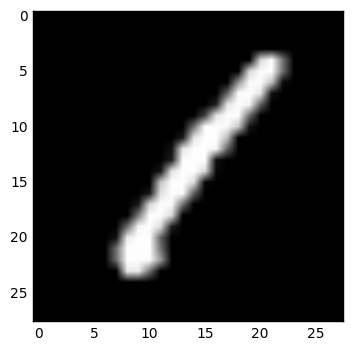

0


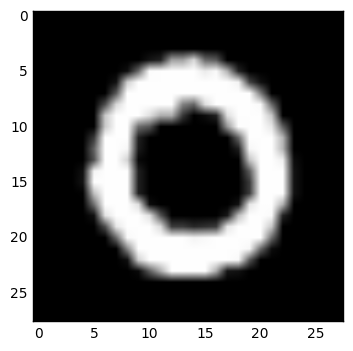

about to fit
score:  0.845
[2]
[1]
[5]


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


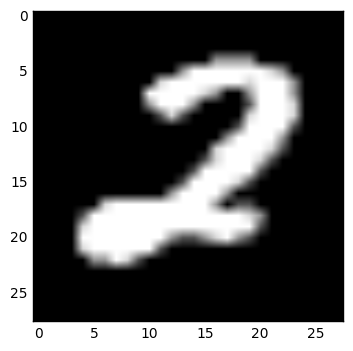

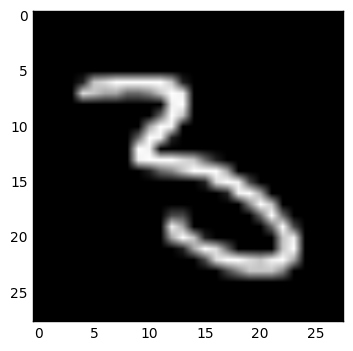

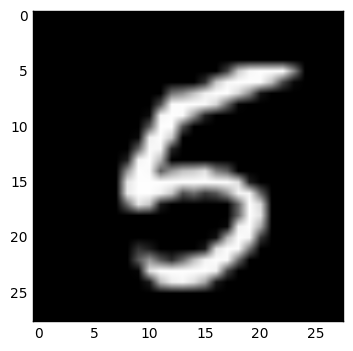

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors
from sklearn import linear_model

df = pd.read_csv("data.csv", header=0)

y = df["label"]
X = df.drop("label", axis=1)

y = np.array(y)
X = np.array(X)

y_train = y[0:999]
X_train = X[0:999]

y_test = y[1000:1200]
X_test = X[1000:1200]

print y[0]
reshaped_example = X[0].reshape(28,28)
image = plt.imshow(reshaped_example,cmap = cm.Greys_r)
plt.show()

print y[1]
reshaped_example = X[1].reshape(28,28)
image = plt.imshow(reshaped_example,cmap = cm.Greys_r)
plt.show()

classifier = neighbors.KNeighborsClassifier()

print 'about to fit'
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print 'score: ', score


prediction = classifier.predict(X_test[-3])
print prediction

prediction = classifier.predict(X_test[-2])
print prediction

prediction = classifier.predict(X_test[-1])
print prediction

reshaped_example = X_test[-3].reshape(28,28)
image = plt.imshow(reshaped_example,cmap = cm.Greys_r)
plt.show()

reshaped_example = X_test[-2].reshape(28,28)
image = plt.imshow(reshaped_example,cmap = cm.Greys_r)
plt.show()

reshaped_example = X_test[-1].reshape(28,28)
image = plt.imshow(reshaped_example,cmap = cm.Greys_r)
plt.show()